In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Salarydf=pd.read_csv("SalaryData.csv")

Salarydf.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
Salarydf.duplicated().sum()

24

In [4]:
Salarydf.drop_duplicates(inplace=True)

In [5]:
Salarydf.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital.loss', 'hours_per_week', 'native_country',
       'SalaryGT50K'],
      dtype='object')

<AxesSubplot:xlabel='SalaryGT50K'>

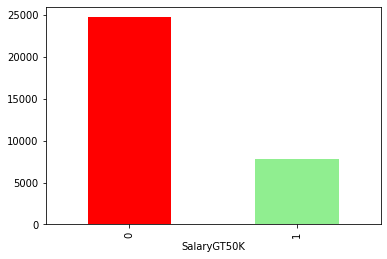

In [6]:
Salarydf.groupby('SalaryGT50K').size().plot(kind='bar',color=['red','lightgreen'])

### Basic Data Exploration
* info()
* Describe()
* nuniques()

In [7]:
Salarydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  SalaryGT50K     32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [8]:
Salarydf.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
count,32537.000000,32537,3.253700e+04,32537,32537.000000,32537,32537,32537,32537,32537,32537.000000,32537.000000,32537.000000,32537,32537.000000
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,22673,NaN,10494,NaN,14970,4136,13187,27795,21815,NaN,NaN,NaN,29153,NaN
mean,38.585887,NaN,1.897808e+05,NaN,10.081815,NaN,NaN,NaN,NaN,NaN,1078.443741,87.368227,40.440329,NaN,0.240926
std,13.625962,NaN,1.055565e+05,NaN,2.571633,NaN,NaN,NaN,NaN,NaN,7387.957424,403.101833,12.346889,NaN,0.427652
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.369930e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


In [9]:
Salarydf.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital.loss         92
hours_per_week       94
native_country       42
SalaryGT50K           2
dtype: int64

In [10]:
Salarydf.corr()

,age,fnlwgt,education_num,capital_gain,capital.loss,hours_per_week,SalaryGT50K
age,1.000000,-0.076381,0.036084,0.077679,0.057550,0.068099,0.233903
fnlwgt,-0.076381,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
education_num,0.036084,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital_gain,0.077679,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital.loss,0.057550,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501
hours_per_week,0.068099,-0.018898,0.148422,0.078408,0.054229,1.000000,0.229658
SalaryGT50K,0.233903,-0.009502,0.335272,0.223336,0.150501,0.229658,1.000000


### Variable Analysis

1. Target :- SalaryGT50K
2. Predictors:-
       i.Continuous:- age,fnlwgt,capital_gain,capital.loss,hours_per_week
       ii. Categorical:- workclass,education,education_num,occupation,relationship,race,sex,native_country

In [11]:
Conti=["age","fnlwgt","capital_gain","capital.loss","hours_per_week"]
Categ=["workclass","education","education_num","occupation","relationship","race","sex","native_country"]
Target='SalaryGT50K'

### Univariate Analysis
* Continuous Variables

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'capital_gain'}>,
        <AxesSubplot:title={'center':'capital.loss'}>],
       [<AxesSubplot:title={'center':'hours_per_week'}>, <AxesSubplot:>]],
      dtype=object)

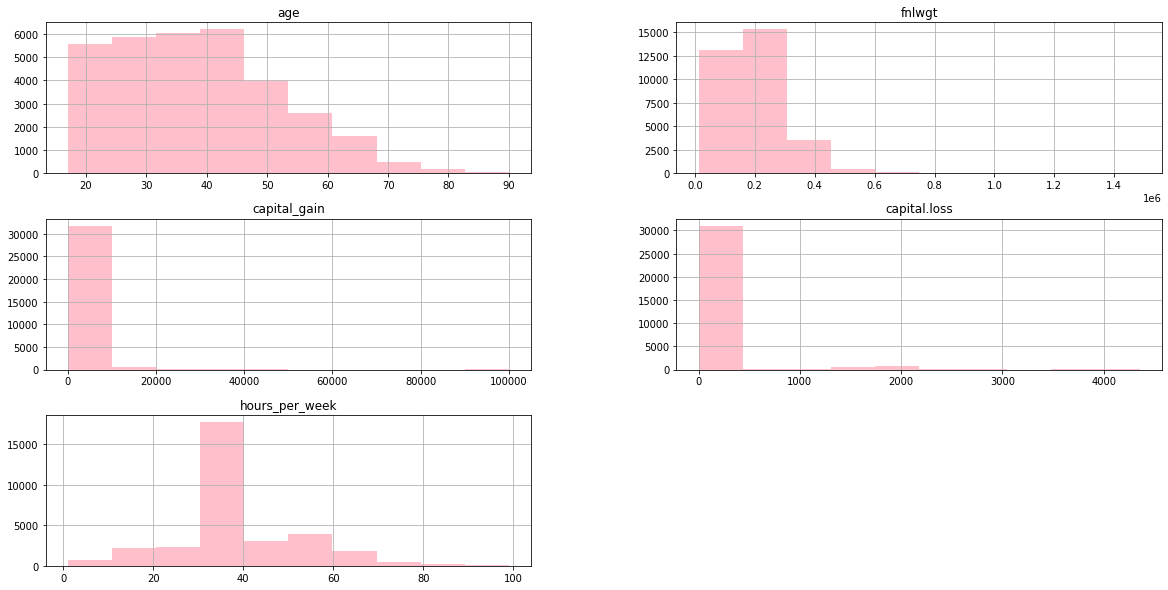

In [12]:
Salarydf[Conti].hist(figsize=(20,10),color='pink')

#### Variables Analysis
* age:Selected
* fnlwgt:Outliars,selected
* capital gain: Outliars,selected
* capital.loss: Outliars,selected
* hours_per_week:selected

#### Treating Outliars

In [3]:
Salarydf['fnlwgt'][Salarydf['fnlwgt']<600000].sort_values(ascending=False)

23600    599629
20536    598995
23156    598802
3409     598606
24096    597843
          ...  
10826     19214
24012     18827
25743     14878
27207     13769
17096     12285
Name: fnlwgt, Length: 32419, dtype: int64

In [4]:
Salarydf['fnlwgt'][Salarydf['fnlwgt']>600000]=599629

In [5]:
Salarydf['capital_gain'][Salarydf['capital_gain']<40000].sort_values(ascending=False)

7186     34095
4568     34095
106      34095
15376    34095
17039    34095
         ...  
12465        0
12464        0
12463        0
12462        0
16279        0
Name: capital_gain, Length: 32400, dtype: int64

In [6]:
Salarydf['capital_gain'][Salarydf['capital_gain']>40000]=34095

In [7]:
Salarydf['capital.loss'][Salarydf['capital.loss']<1000].sort_values(ascending=False)

11043    974
7032     974
15610    880
32500    880
4424     880
        ... 
10854      0
10853      0
10852      0
10851      0
32560      0
Name: capital.loss, Length: 31078, dtype: int64

In [8]:
Salarydf['capital.loss'][Salarydf['capital.loss']>1000]=974

* Plotting After Outliar Treatment

array([[<AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'capital_gain'}>],
       [<AxesSubplot:title={'center':'capital.loss'}>, <AxesSubplot:>]],
      dtype=object)

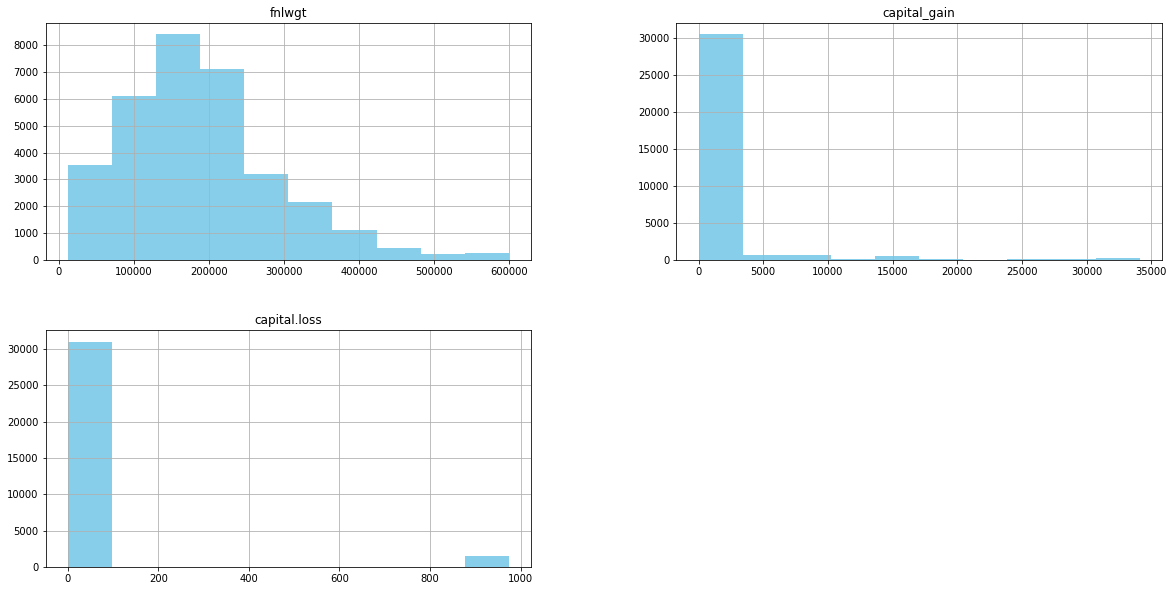

In [19]:
Salarydf[['fnlwgt','capital_gain','capital.loss']].hist(figsize=(20,10),color='skyblue')

* Categorical Variable

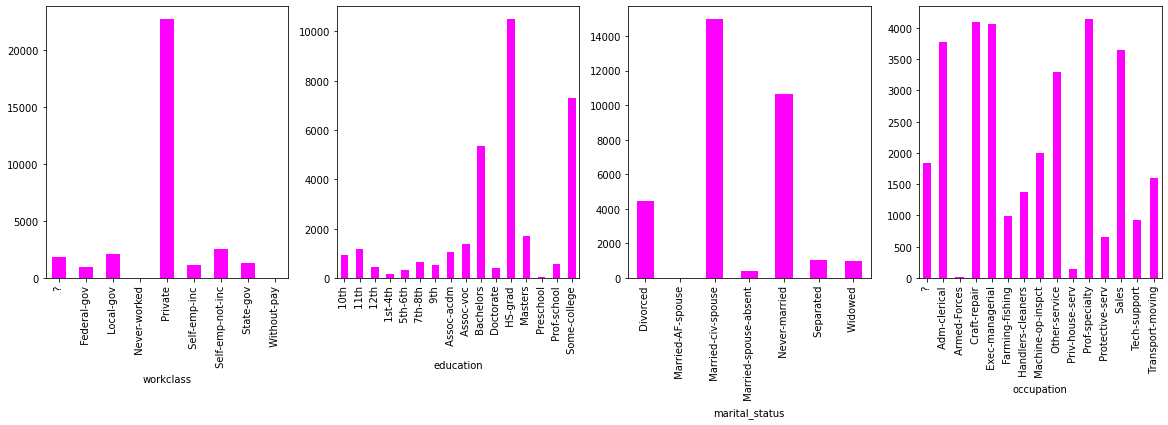

In [20]:
fig,subplot=plt.subplots(nrows=1,ncols=4,figsize=(20,5))
for i,j in zip(['workclass', 'education', 'marital_status','occupation'],range(4)):
    Salarydf.groupby(i).size().plot(kind='bar',ax=subplot[j],color='magenta')
    

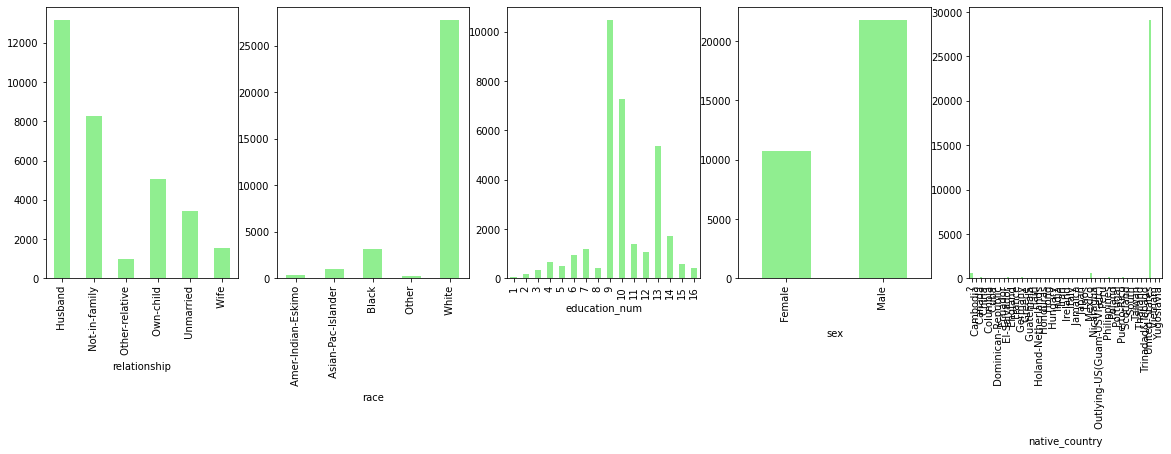

In [21]:
fig,subplot=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i,j in zip(['relationship', 'race','education_num','sex', 'native_country'],range(5)):
    Salarydf.groupby(i).size().plot(kind='bar',ax=subplot[j],color='lightgreen')
    

#### Treating imbalance in  Columns 
* Race,Native_Country

In [9]:
for i in ['workclass','education','occupation','relationship','race','sex','native_country']:
    Salarydf[i]=Salarydf[i].apply(lambda X : X.strip())

Salarydf['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [10]:
Salarydf['race'][(Salarydf['race']!='Black')&(Salarydf['race']!='White')]='Other'

In [11]:
Salarydf['native_country'][Salarydf['native_country']!='United-States']='Other'

### Bivariate Analysis

* Continuous vs Categorical

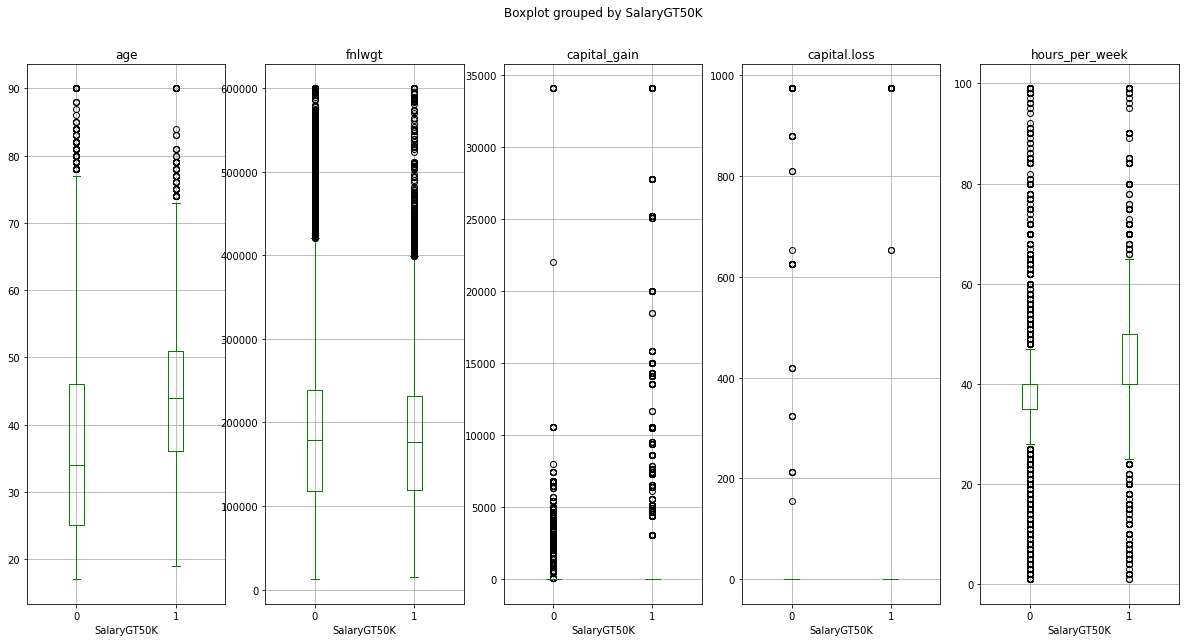

In [25]:
fig,subplot=plt.subplots(nrows=1,ncols=5,figsize=(20,10))
for i,j in zip(Conti,range(len(Conti))):
    Salarydf.boxplot(by=Target,column=i,ax=subplot[j],color='green')


### Anova Test


In [26]:
Salarydf.groupby(Target)[Conti[0]].apply(list)

SalaryGT50K
0    [39, 50, 38, 53, 28, 37, 49, 23, 32, 34, 25, 3...
1    [52, 31, 42, 37, 30, 40, 43, 40, 56, 54, 31, 5...
Name: age, dtype: object

In [27]:
def fun_anova(df,target,predictors):
    from scipy.stats import f_oneway
    
    for i in predictors:
        inplist=df.groupby(target)[i].apply(list)
        
        anova=f_oneway(*inplist)
        
        if anova[1]<0.05:
            print("Column",i,"is correlated with ",target,"with p-value :",anova[1])
        
        else:
            print("Column",i,"is Not Corelated with ",target,"with p-value :",anova[1])
            

fun_anova(Salarydf,Target,Conti)

Column age is correlated with  SalaryGT50K with p-value : 0.0
Column fnlwgt is Not Corelated with  SalaryGT50K with p-value : 0.10034099994119691
Column capital_gain is correlated with  SalaryGT50K with p-value : 0.0
Column capital.loss is correlated with  SalaryGT50K with p-value : 4.266838502495211e-143
Column hours_per_week is correlated with  SalaryGT50K with p-value : 0.0


#### Selected Variables
* age,capital_gain,capital.loss,hours_per_week

* Categorical Vs Categorical


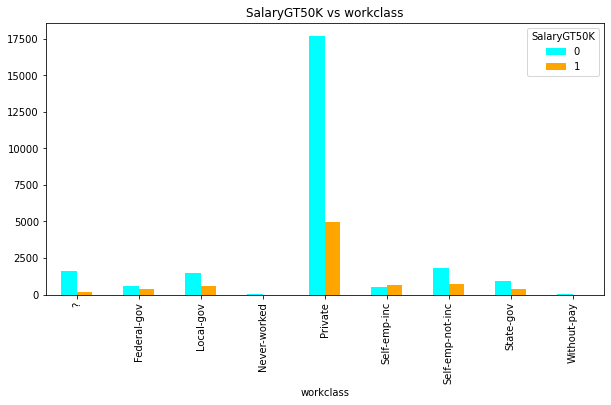

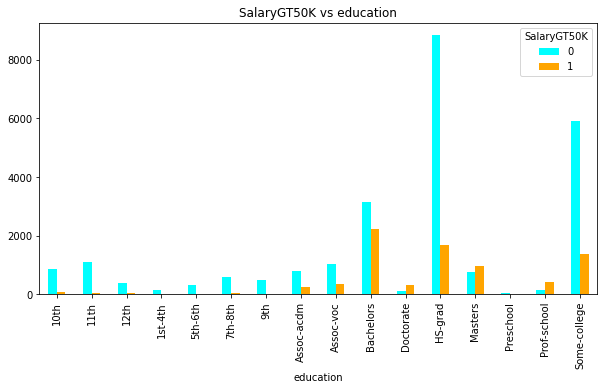

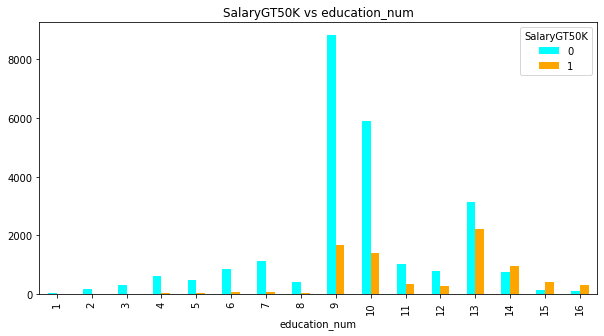

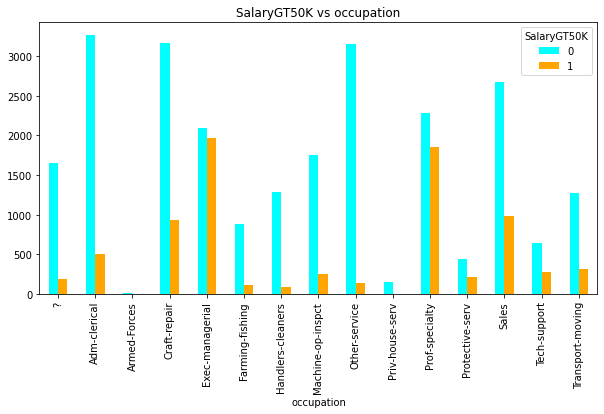

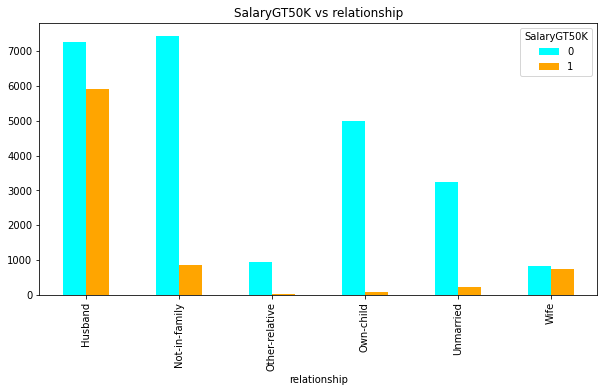

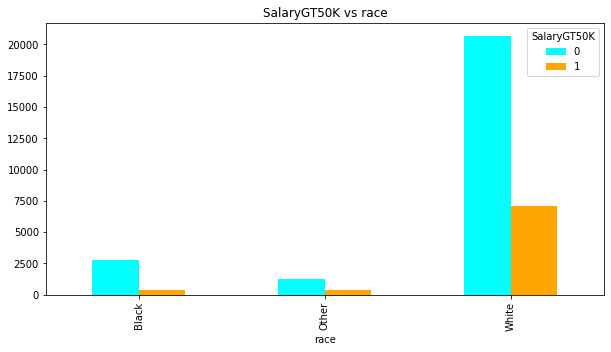

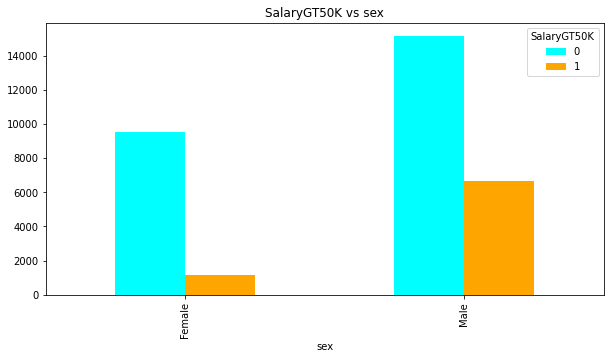

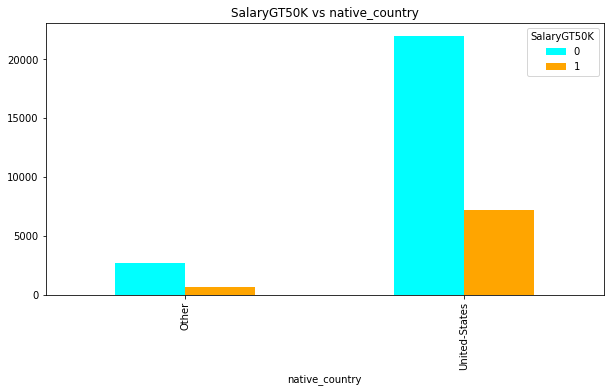

In [28]:
# fig,subplot=plt.subplots(nrows=len(Categ),ncols=1,figsize=(10,30))

# for i,j in zip(Categ,range(len(Categ))):
#     pd.crosstab(index=Salarydf[i],columns=Salarydf[Target]).plot(kind='bar',ax=subplot[j],color=['cyan','yellow'],title="SalaryGT50K vs "+i)

for i in Categ:
    pd.crosstab(index=Salarydf[i],columns=Salarydf[Target]).plot(kind='bar',color=['cyan','orange'],figsize=(10,5),title="SalaryGT50K vs "+i)
    plt.show()

### Categ vs Categ Chi2 Test

In [29]:
from scipy.stats import chi2_contingency

def chi2_test(df,predictor,target):
    selectedfeature=[]
    for i in predictor:
        testdata=pd.crosstab(index=df[i],columns=df[target])
        chi2=chi2_contingency(testdata)
        
        if chi2[1]<0.05:
            print("Column is Correlated with",Target,"With  P-Value:-",chi2[1])
            selectedfeature.append(i)
        
        else:
            print("Column is Not Correlated with",Target,"With  P-value:-",chi2[1])
    return selectedfeature


chi2_test(Salarydf,Categ,Target)
        

Column is Correlated with SalaryGT50K With  P-Value:- 3.352256069028484e-220
Column is Correlated with SalaryGT50K With  P-Value:- 0.0
Column is Correlated with SalaryGT50K With  P-Value:- 0.0
Column is Correlated with SalaryGT50K With  P-Value:- 0.0
Column is Correlated with SalaryGT50K With  P-Value:- 0.0
Column is Correlated with SalaryGT50K With  P-Value:- 5.261106981519217e-61
Column is Correlated with SalaryGT50K With  P-Value:- 0.0
Column is Correlated with SalaryGT50K With  P-Value:- 7.804143463331444e-10


['workclass',
 'education',
 'education_num',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

### Final Selected Predictors
* Continuous :- age,capital_gain,capital.loss,hours_per_week
* Categorical :- 'workclass','education','education_num','occupation','relationship','race','sex','native_country'

In [30]:
SalaryMl=Salarydf[['age','capital_gain','capital.loss','hours_per_week','workclass','education','education_num','occupation','relationship','race','sex']]# 'native_country']]
SalaryMl.head()

,age,capital_gain,capital.loss,hours_per_week,workclass,education,education_num,occupation,relationship,race,sex
0,39,2174,0,40,State-gov,Bachelors,13,Adm-clerical,Not-in-family,White,Male
1,50,0,0,13,Self-emp-not-inc,Bachelors,13,Exec-managerial,Husband,White,Male
2,38,0,0,40,Private,HS-grad,9,Handlers-cleaners,Not-in-family,White,Male
3,53,0,0,40,Private,11th,7,Handlers-cleaners,Husband,Black,Male
4,28,0,0,40,Private,Bachelors,13,Prof-specialty,Wife,Black,Female


In [31]:
SalaryMl.nunique()

age                73
capital_gain      117
capital.loss       10
hours_per_week     94
workclass           9
education          16
education_num      16
occupation         15
relationship        6
race                3
sex                 2
dtype: int64

### Preparing Data for ML
* Converting Categorical column values to numerical

In [32]:
SalaryMl['sex'].replace({'Male':1,"Female":0},inplace=True)

In [34]:
# SalaryMl['native_country'].replace({'United-States':1,'Other':0},inplace=True)

In [35]:
SalaryMl=pd.get_dummies(SalaryMl)

* Standardizing/Normalizing Data

In [36]:
X=SalaryMl.values
y=Salarydf[Target].values

from sklearn.preprocessing import StandardScaler

X=StandardScaler().fit_transform(X)

X


array([[ 0.03039195,  0.41016818, -0.22072807, ..., -0.3257857 ,
        -0.22890687,  0.41304506],
       [ 0.83768681, -0.21865451, -0.22072807, ..., -0.3257857 ,
        -0.22890687,  0.41304506],
       [-0.04299849, -0.21865451, -0.22072807, ..., -0.3257857 ,
        -0.22890687,  0.41304506],
       ...,
       [ 1.42481035, -0.21865451, -0.22072807, ..., -0.3257857 ,
        -0.22890687,  0.41304506],
       [-1.21724557, -0.21865451, -0.22072807, ..., -0.3257857 ,
        -0.22890687,  0.41304506],
       [ 0.98446769,  4.12699043, -0.22072807, ..., -0.3257857 ,
        -0.22890687,  0.41304506]])

* Splitting Data into Train and Test

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape,sep='\n')


(22775, 55)
(9762, 55)
(22775,)
(9762,)


### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

LR=LogisticRegression(C=10,penalty='l2',solver='newton-cg')
LR.fit(X_train,y_train)

pred=LR.predict(X_test)

print(classification_report(y_test,pred))
print(confusion_matrix(pred,y_test))
f1_score=metrics.f1_score(pred,y_test,average='weighted')
print("F1 score of test data is :-",round(f1_score,2))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7405
           1       0.73      0.61      0.67      2357

    accuracy                           0.85      9762
   macro avg       0.81      0.77      0.79      9762
weighted avg       0.85      0.85      0.85      9762

[[6883  915]
 [ 522 1442]]
F1 score of test data is :- 0.86


In [48]:
from sklearn.model_selection import cross_val_score

cv=cross_val_score(LR,X,y,cv=10,scoring='f1_weighted')
print(cv)
print("Final Average Accuracy of Model is ",round(np.mean(cv),2))

[0.84074989 0.84276341 0.84830857 0.83328362 0.85015683 0.84618949
 0.84596823 0.85274083 0.84819408 0.8457343 ]
Final Average Accuracy of Model is  0.85


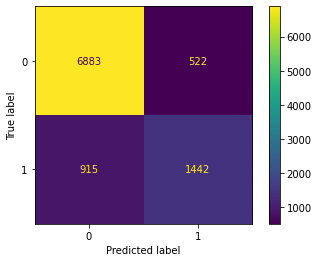

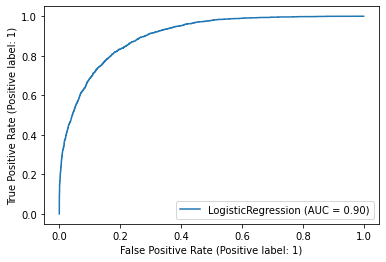

In [49]:
metrics.plot_confusion_matrix(LR,X_test,y_test)
metrics.plot_roc_curve(LR,X_test,y_test)

### Decision Tree

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      7405
           1       0.78      0.51      0.62      2357

    accuracy                           0.85      9762
   macro avg       0.82      0.73      0.76      9762
weighted avg       0.84      0.85      0.84      9762

[[7067  338]
 [1144 1213]]
F1 Score of fitted model is :- 0.84
[0.82492626 0.83344319 0.83831622 0.82575477 0.83438495 0.83212154
 0.83329162 0.84377438 0.84457394 0.82899165]
Final Average accuracy of model is :-  0.83


<AxesSubplot:>

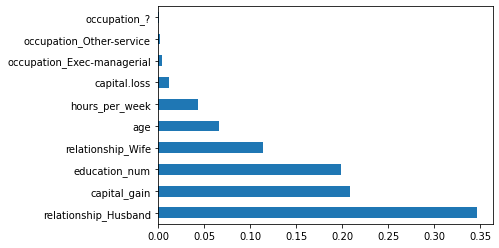

In [81]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(max_depth=6,criterion='entropy')
DT.fit(X_train,y_train)

predDT=DT.predict(X_test)

print(classification_report(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print("F1 Score of fitted model is :-",round(metrics.f1_score(y_test,predDT,average='weighted'),2))

cvDT=cross_val_score(DT,X,y,cv=10,scoring='f1_weighted')
print(cvDT)
print("Final Average accuracy of model is :- ",round(np.mean(cvDT),2))

features=pd.Series(DT.feature_importances_,index=list(SalaryMl.columns))

features.nlargest(10).plot(kind='barh')


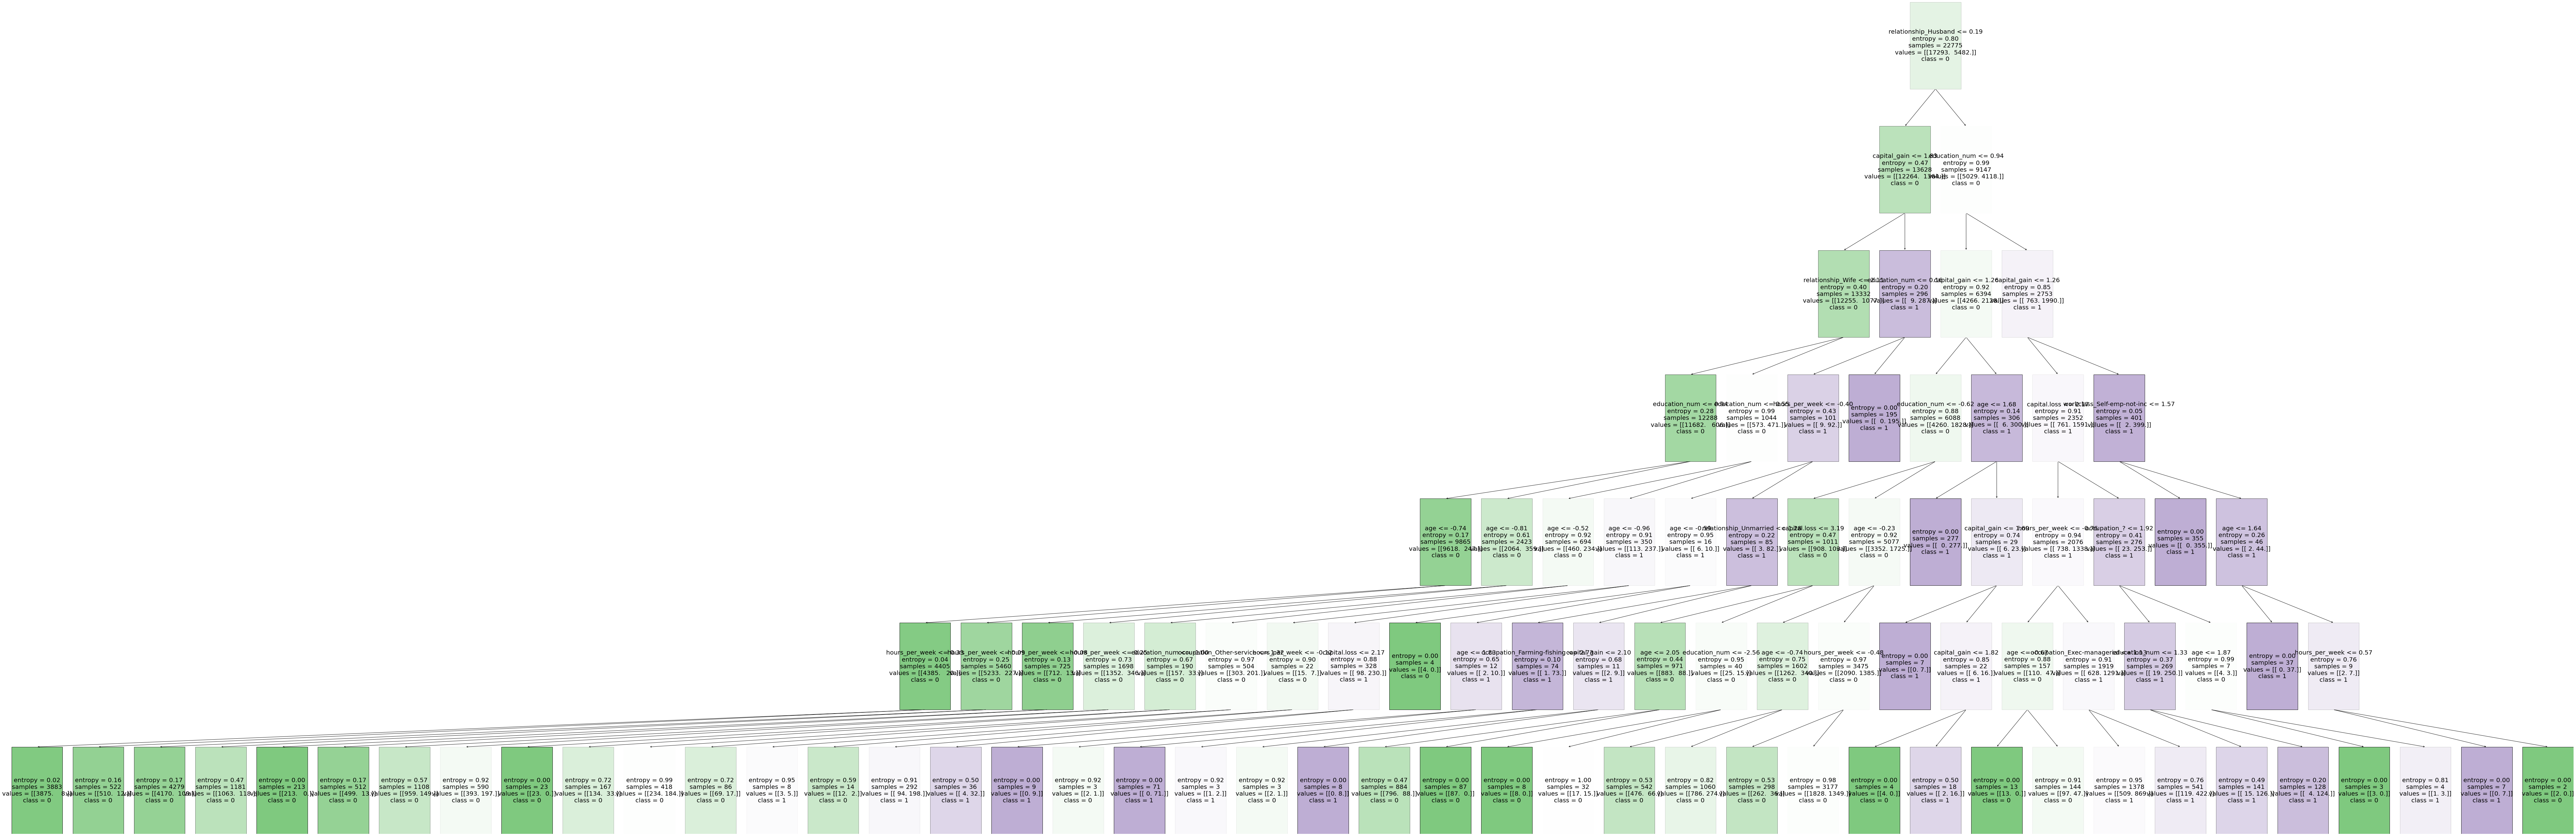

In [99]:
from dtreeplt import dtreeplt
dtree=dtreeplt(model=DT,feature_names=list(SalaryMl.columns),target_names=[0,1])
fig=dtree.view()

tree=plt.gcf()
tree.set_size_inches(150,50)

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(DT, out_file=None, 
                                feature_names=list(SalaryMl.columns), class_names=['0','1'])
# printing the rules
# print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=3000,height=3000)
# Double click on the graph to zoom in


In [14]:
Salarydf

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital.loss,hours_per_week,native_country,SalaryGT50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


### Dimensionality Reduction

[99.88488314 99.99959777 99.99999671 99.99999847 99.9999999  99.99999996
 99.99999997 99.99999997 99.99999997 99.99999998 99.99999998 99.99999998
 99.99999998 99.99999998 99.99999998 99.99999999 99.99999999 99.99999999
 99.99999999 99.99999999]


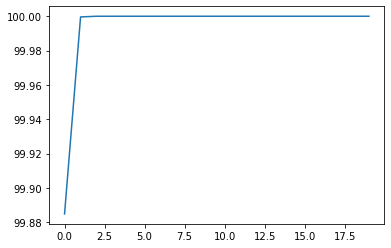

In [15]:
from sklearn.decomposition import PCA
Target="SalaryGT50K"
pca=PCA(n_components=20)

pca.fit_transform(pd.get_dummies(Salarydf.drop(Target,axis=1)).values)
explained_variance=pca.explained_variance_ratio_

explained_variance=np.cumsum(explained_variance)*100
print(explained_variance)
plt.plot(explained_variance)

In [16]:
# generating 2 pca components

pca=PCA(n_components=2)
pca_comp=pca.fit_transform(pd.get_dummies(Salarydf.drop(Target,axis=1)).values)
X=pca_comp
y=Salarydf[Target].values
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# mm=MinMaxScaler()
# Any one
ss=StandardScaler()
# X=mm.fit_transform(X)
X=ss.fit_transform(X)
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

### Decision Trees

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      9229
           1       0.22      0.96      0.35       540

    accuracy                           0.81      9769
   macro avg       0.61      0.88      0.62      9769
weighted avg       0.95      0.81      0.86      9769

F1 score of Fitted Model is : 0.8567991966239346


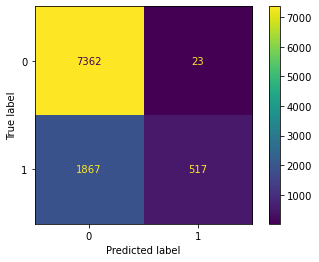

[0.76050959 0.75642665 0.75588545 0.76063093 0.75648922 0.76855121
 0.75002745 0.76606308 0.76019166 0.76692658]
Final averge f1 score of model is : 0.7601701839664099
Test Accuracy of Model is :  0.8065308629337701


In [17]:
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(max_depth=7,criterion='entropy')

DT.fit(X_train,y_train)
predDT=DT.predict(X_test)

print(classification_report(predDT,y_test))
print("F1 score of Fitted Model is :",f1_score(predDT,y_test,average='weighted'))
print(plot_confusion_matrix(DT,X_test,y_test))
plt.show()

cv=cross_val_score(DT,X,y,cv=10,scoring='f1_weighted')

print(cv)
print("Final averge f1 score of model is :",np.mean(cv))
print("Test Accuracy of Model is : ",accuracy_score(predDT,y_test))


